In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
%cd sample_data

/content/sample_data


In [5]:
cp -avr '/content/drive/My Drive/lgg_tcga' '/content/sample_data/'

'/content/drive/My Drive/lgg_tcga' -> '/content/sample_data/lgg_tcga'
'/content/drive/My Drive/lgg_tcga/meta_linear_CNA.txt' -> '/content/sample_data/lgg_tcga/meta_linear_CNA.txt'
'/content/drive/My Drive/lgg_tcga/meta_methylation_hm450.txt' -> '/content/sample_data/lgg_tcga/meta_methylation_hm450.txt'
'/content/drive/My Drive/lgg_tcga/meta_gistic_genes_amp.txt' -> '/content/sample_data/lgg_tcga/meta_gistic_genes_amp.txt'
'/content/drive/My Drive/lgg_tcga/meta_rppa.txt' -> '/content/sample_data/lgg_tcga/meta_rppa.txt'
'/content/drive/My Drive/lgg_tcga/meta_rppa_Zscores.txt' -> '/content/sample_data/lgg_tcga/meta_rppa_Zscores.txt'
'/content/drive/My Drive/lgg_tcga/meta_RNA_Seq_v2_expression_median.txt' -> '/content/sample_data/lgg_tcga/meta_RNA_Seq_v2_expression_median.txt'
'/content/drive/My Drive/lgg_tcga/cBioPortal_validation_report_lgg_tcga.htm' -> '/content/sample_data/lgg_tcga/cBioPortal_validation_report_lgg_tcga.htm'
'/content/drive/My Drive/lgg_tcga/meta_bcr_clinical_sample.txt

In [1]:
!pip install tensorflow==2.0

In [0]:
# if running in colab, this block chooses tf 2.0:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
assert '2.' in tf.__version__  # make sure you're using tf 2.0

In [0]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("/content/sample_data/lgg_tcga/data_bcr_clinical_data_patient.txt",delimiter="\t",header = None)

In [5]:
clinic = dataset.iloc[4:]
clinic = clinic.reset_index()
del clinic['index']
new_header = clinic.iloc[0] #grab the first row for the header
c_d = clinic[1:] #take the data less the header row
c_d.columns = new_header #set the header row as the df header
c_d = c_d.reset_index()
del c_d['index']
c_d

,OTHER_PATIENT_ID,PATIENT_ID,FORM_COMPLETION_DATE,HISTOLOGICAL_DIAGNOSIS,GRADE,LATERALITY,TUMOR_SITE,SUPRATENTORIAL_LOCALIZATION,PROSPECTIVE_COLLECTION,RETROSPECTIVE_COLLECTION,SEX,RACE,ETHNICITY,HISTORY_OTHER_MALIGNANCY,HISTORY_NEOADJUVANT_TRTYN,INITIAL_PATHOLOGIC_DX_YEAR,HISTORY_IONIZING_RT_TO_HEAD,SEIZURE_HISTORY,HEADACHE_HISTORY,SYMP_CHANGES_MENTAL_STATUS,SYMP_CHANGES_VISUAL,SYMP_CHANGES_SENSORY,SYMP_CHANGES_MOTOR_MOVEMENT,RELATED_SYMPTOM_FIRST_PRESENT,FIRST_SYMPTOM_LONGEST_DURATION,ASTHMA_HISTORY,ECZEMA_HISTORY,HAY_FEVER_HISTORY,MOLD_OR_DUST_ALLERGY_HISTORY,ASTHMA_ECZEMA_ALLERGY_FIRST_DIAGNOSIS,FOOD_ALLERGY_HISTORY,FOOD_ALLERGY_TYPES,FOOD_ALLERGY_AGE,ANIMAL_INSECT_ALLERGY_HIST,ANIMAL_INSECT_ALLERGY_AGE,HISTORY_NEOADJUVANT_STEROID_TX,HISTORY_NEOADJUVANT_MEDICATION,VITAL_STATUS,TUMOR_STATUS,FAMILY_HISTORY_OF_CANCER,FAMILY_HISTORY_OF_PRIMARY_BRAIN_TUMOR,IDH1_MUTATION_TEST_INDICATOR,IDH1_MUTATION_TEST_METHOD,IDH1_MUTATION,INHERITED_GENETIC_SYNDROME_INDICATOR,INHERITED_GENETIC_SYNDROME_SPECIFIED,KARNOFSKY_PERFORMANCE_SCORE,ECOG_SCORE,PERFORMANCE_STATUS_TIMING,PERFORMANCE_STATUS_DAYS_TO,RADIATION_TREATMENT_ADJUVANT,TREATMENT_OUTCOME_FIRST_COURSE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,AGE,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,DISEASE_CODE,ICD_10,ICD_O_3_HISTOLOGY,ICD_O_3_SITE,INFORMED_CONSENT_VERIFIED,PROJECT_CODE,TARGETED_MOLECULAR_THERAPY,TISSUE_SOURCE_SITE,SITE_OF_TUMOR_TISSUE,OS_STATUS,OS_MONTHS,DFS_STATUS,DFS_MONTHS
0,334f715e-08dc-4a29-b8e4-b010b829c478,TCGA-CS-4938,2/15/12,Astrocytoma,G2,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Female,WHITE,NOT HISPANIC OR LATINO,No,No,2005,NO,YES,NO,NO,NO,NO,NO,Seizures,> 181 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],YES,12 - 20 Years,NO,NO,Alive,[Not Available],YES,YES,NO,[Not Available],[Not Available],[Not Available],[Not Available],90,1,Preoperative,-1,[Not Available],[Not Available],[Not Available],31,0,[Not Available],C71.9,9400/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,LIVING,117.41,DiseaseFree,117.41
1,fc222f23-b3b2-4ac0-bc61-e8e8fa5cc160,TCGA-CS-4941,4/5/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,WHITE,NOT HISPANIC OR LATINO,No,No,2005,NO,[Not Available],YES,[Not Available],[Not Available],[Not Available],[Not Available],Headaches,0 - 30 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],[Not Available],[Not Available],Dead,WITH TUMOR,[Not Available],[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],90,1,Preoperative,77,[Not Available],[Not Available],[Not Available],67,0,[Not Available],C71.9,9401/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,7.69,Recurred/Progressed,0.3
2,230f5fa7-aa36-41ea-b40b-08f520767bd5,TCGA-CS-4942,3/15/11,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",White Matter,NO,YES,Female,BLACK OR AFRICAN AMERICAN,[Not Available],No,No,2006,NO,YES,NO,YES,NO,YES,YES,Mental Status Changes,0 - 30 Days,NO,NO,NO,NO,[Not Available],NO,[Not Available],[Not Available],NO,[Not Available],NO,NO,Dead,WITH TUMOR,NO,NO,NO,[Not Available],[Not Available],NO,[Not Available],90,1,Preoperative,-21,[Not Available],[Not Available],[Not Available],44,0,[Not Available],C71.9,9401/3,C71.9,YES,[Not Available],[Not Available],CS,Central nervous system,DECEASED,43.86,Recurred/Progressed,38.9
3,952dfd5d-e65a-4307-b6a9-2ed2b0d2d9ce,TCGA-CS-4943,3/16/11,Astrocytoma,G3,Left,"Supratentorial, Frontal Lobe",Cerebral Cortex,NO,YES,Male,WHITE,[Not Available],No,No,2009,NO,YES,YES,[Not Available],[Not Available],[Not Available],[Not Available],Seizures,> 181 Days,[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],[Not Available],YES,Dead,WITH TUMOR,[Not Available],[Not Available],NO,[Not Available],[Not Available],[Not Available],[Not Available],50,4,Preoperative,9,[Not Available],[Not Av

In [6]:
gene = pd.read_csv("/content/sample_data/lgg_tcga/data_RNA_Seq_v2_mRNA_median_Zscores.txt",delimiter="\t")
gene = np.transpose(gene)
new_header = gene.iloc[0] #grab the first row for the header
gene = gene[2:] #take the data less the header row
gene.columns = new_header #set the header row as the df header
gene = gene.reset_index()
gene

Hugo_Symbol,index,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938-01,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941-01,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942-01,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943-01,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944-01,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
gene['index'] = gene['index'].str[:-3] #index can be taken as patient ID
gene

Hugo_Symbol,index,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [8]:
gene.rename(columns={ gene.columns[0]: "PATIENT_ID" }, inplace = True)
gene

Hugo_Symbol,PATIENT_ID,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,LOC317712,CXORF67,EFCAB8,SRP14P1,LOC391343,TRIM75P,SPATA31B1P,LOC286106,SDR16C6P,LOC553137,KIAA1618,LOC645851,RGPD7,HSPB1P1,PPBPL1,LOC594835,ANKRD20A20P,TMPRSS11E2,LOC100132347,EFCAB12,LOC147680,A1CF,RBFOX1,GGACT,A2ML1,A2M,P1,A4GNT,NPSR1-AS1,AAAS,...,ZRANB1,ZRANB2,ZRANB3,ZRSR2,ZSCAN10,ZNF96P1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN1,ZSCAN20,LOC115537,ZNF50,ZSCAN23,ZSCAN29,LOC90393,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,LOC154274,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-CS-4938,-0.2235,-0.1491,0.5876,2.4595,0.7863,NaN,-0.9099,-0.7037,-0.0749,NaN,-0.4553,-0.2867,1.6465,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-0.3131,-0.994,0.199,-0.4089,NaN,-0.2948,-0.344,-0.2653,-0.9343,0.1554,-0.0883,-0.3637,-0.5132,-0.6759,-0.1377,0.163,-0.3781,-0.6448,-0.1669,-0.8392,...,0.1914,-0.1136,-0.2045,-0.217,-0.3346,-0.5321,1.5191,-1.3753,1.1387,0.2181,-0.16,1.1522,0.7714,-0.3969,-0.2047,0.2735,0.5898,0.1588,0.1128,0.9743,0.1995,-0.1621,-0.8057,0.0634,-0.761,0.3701,-0.5992,-0.2914,-0.7002,-0.7279,-0.2301,0.628,0.1214,-0.2823,0.3075,-0.5859,-1.1638,1.0323,0.0813,-0.1607
1,TCGA-CS-4941,-0.2235,2.9143,0.4397,0.1229,-1.0699,NaN,-0.4965,0.5974,-0.0749,NaN,-0.2692,-0.3576,2.3617,-0.5144,-0.0886,-0.2081,-0.0569,-0.0435,-0.0969,0.8599,-0.1108,-0.5198,0.0321,NaN,-0.2948,-0.4735,-0.2653,-0.499,1.212,-0.3367,-0.3637,0.0143,2.5374,1.5784,0.4903,0.6359,0.1465,-0.1669,-1.841,...,-1.3265,-0.3126,0.8223,-0.1075,-0.285,-0.4416,0.0624,-0.2911,2.0021,0.7473,1.4407,0.4726,1.2566,-0.0722,-0.0758,-1.06,0.3769,2.0773,-0.208,-1.0627,0.8676,-1.5404,-0.3657,-0.0391,-1.0781,-1.0474,-0.814,0.0727,0.1707,-0.4477,0.9896,0.1929,-0.1752,-0.2098,0.8533,0.5083,0.0306,1.8282,-0.5316,-0.1607
2,TCGA-CS-4942,-0.2235,0.1932,-0.5138,0.717,-0.1279,NaN,-1.0589,-1.1218,-0.0749,NaN,-0.5059,-0.3568,2.278,0.3933,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,0.0643,-1.2125,0.4478,-0.547,NaN,-0.2948,-0.6603,-0.2653,-0.659,-0.133,-0.3115,-0.3637,-0.1497,0.2572,-0.0079,0.6276,-0.7202,-0.3803,-0.1669,-0.9459,...,-0.383,-0.4978,-0.559,-0.655,-0.3346,-0.5354,-0.9633,0.5988,-1.0984,-0.364,0.832,-0.0063,-1.2473,2.6705,0.3756,-0.2245,-0.6091,-0.9005,-0.8427,-1.4864,0.7502,-0.1154,-0.3523,0.5575,-0.0681,0.4529,-0.8666,0.3499,-0.3761,-0.0929,1.261,0.0893,-0.6099,-0.2096,0.5007,-0.2919,-0.602,0.4587,0.8311,-0.1607
3,TCGA-CS-4943,-0.2235,-0.1604,-1.0718,2.4858,0.7452,NaN,-1.1971,-0.7969,-0.0749,NaN,-0.5645,-0.6862,1.0537,-0.5144,-0.1157,-0.2081,-0.0569,-0.0435,-0.0969,0.1529,-0.7298,0.661,-0.648,NaN,-0.2842,0.1015,-0.2653,-0.3842,-0.2589,-0.8163,-0.3637,-0.4897,-0.6637,0.0132,-0.1543,-0.8229,0.3522,-0.1669,2.086,...,1.1507,-0.2505,0.9096,-0.9827,-0.3112,-0.6067,-0.8019,0.6467,-0.8145,-0.6036,1.7108,-0.582,0.2684,0.0259,1.0115,0.9593,-0.6091,0.0413,-0.2899,-0.1006,-0.6064,0.8799,0.2367,-0.0054,-0.4121,-0.7721,0.7886,2.0347,4.0743,4.5575,0.4953,0.3768,0.0402,0.4034,0.8724,-0.3316,0.497,0.3806,-0.3305,-0.1607
4,TCGA-CS-4944,-0.2235,-1.1115,1.2928,1.3686,0.6506,NaN,-1.2052,-1.1218,-0.0749,NaN,-0.3276,-0.6862,4.5702,-0.5144,-0.5807,-0.2081,-0.0569,-0.0435,-0.0969,-1.4704,-1.4645,-0.6804,0.3581,NaN,-0.2948,-0.7228,-0.2653,-0.2402,-0.1192,-0.8762,-0.3637,-0.4262,-0.5644,-0.0766,-0.2397,0.1101,-0.2593,-0.1669,-1.0652,...,0.5006,-0.8714,-1.1369,-0.4314,-0.3346,0.5686,-1.6306,-0.3635,-0.6546,-0.0445,-0.8429,-0.319,-1.5369,-1.3197,-1.1389,-0.607,-0.6091,-0.566,-0.1426,-1.7304,-0.8364,-0.6208,-1.1464,-0.2302,-0.7737,0.6807,-2.0331,-0.3378,-0.8859,-0.6992,-0.8679,-0.9319,-0.9236,-0.1763,-0.2707,-0.5412,-2.149,-0.6506,-0.531,-0.1607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
label = c_d[['PATIENT_ID','VITAL_STATUS']]
labeled_gene = pd.merge( gene, label, on="PATIENT_ID", how='left')
labeled_gene.loc[labeled_gene['VITAL_STATUS'] =='Dead', 'VITAL_STATUS'] = 1
labeled_gene.loc[labeled_gene['VITAL_STATUS'] =='Alive', 'VITAL_STATUS'] = 0
labeled_gene['VITAL_STATUS'].value_counts()
labeled_gene = labeled_gene.dropna(axis='columns',how='all' )
labeled_gene = labeled_gene.dropna(how='any' )

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(labeled_gene.drop(['PATIENT_ID', 'VITAL_STATUS'], axis=1).values,labeled_gene['VITAL_STATUS'].values, test_size=.2)

y_test = y_test.astype(np.float)

y_train = y_train.astype(np.float)


X_train = X_train.astype(np.float)

X_test = X_test.astype(np.float)

## Feature selection by using PLS

When the number of principle component is 3, the test roc is 0.693
When the number of principle component is 4, the test roc is 0.7041
When the number of principle component is 5, the test roc is 0.7273
When the number of principle component is 6, the test roc is 0.7193
When the number of principle component is 7, the test roc is 0.708
When the number of principle component is 8, the test roc is 0.7103
When the number of principle component is 9, the test roc is 0.7098


Text(0, 0.5, 'ROC')

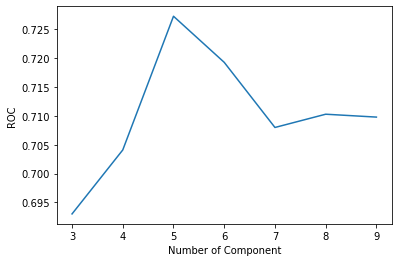

In [12]:


from sklearn.metrics import average_precision_score, roc_auc_score

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

parameter_sigma = [3,4,5,6,7,8,9]

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=2)

test_roc_mean = []
for p_s in parameter_sigma:

    validation_roc = []
    for result0,result1 in kf.split(X_train):
        #train = X_train[result0]
        #test =  X_train[result1]
        
        X = X_train[result0]
        Y = y_train[result0]
        x = X_train[result1]
        y = y_train[result1]
        #print(X.shape, Y.shape, x.shape, y.shape)
        pls = PLSRegression(n_components=p_s)
        pls.fit(X, Y)

        y_pred = pls.predict(x)
        #print(y_pred.shape)
        y_pred = np.reshape(y_pred,(y.shape[0],))
        y = y.astype(np.float)
        #print(y.shape)
        #print(y_pred.shape)
        roc = roc_auc_score(y, y_pred)
        
        validation_roc.append(roc)

    test_roc_mean.append(round(np.mean(validation_roc),4))
    print("When the number of principle component is {}, the test roc is {}"
          .format(p_s,round(np.mean(validation_roc),4)))

pls_final_model = PLSRegression(n_components=6)
x_scores, y_scores= pls_final_model.fit_transform(X_train, y_train)
plt.plot(parameter_sigma, test_roc_mean)
plt.xlabel("Number of Component")
plt.ylabel("ROC")


In [0]:
from sklearn import metrics

In [0]:
x_s_table = pd.DataFrame(x_scores)
loadings = pls_final_model.x_loadings_
X_test_features = np.matmul(X_test,loadings)
from sklearn.linear_model import LogisticRegression

L_R = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R.fit(x_s_table, y_train)

prediction_y = L_R.predict(X_test_features)

print(roc_auc_score(y_test, prediction_y))

In [0]:
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))

Accuracy after feature selection: 0.6981132075471698


## The Logisitic Regression result without feature selection

In [0]:
## The Logisitic Regression result without feature selection

L_R_no_selection = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R_no_selection.fit(X_train, y_train)

pred_y =  L_R_no_selection.predict(X_test)

roc_auc_score(y_test, pred_y)

0.7215116279069766

In [0]:
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, pred_y))

Accuracy after feature selection: 0.6415094339622641


## Random forest (include with and withou PLS to compare)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

for depth in range(1,10):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(x_s_table,y_train)
    prediction_y=clf.predict(X_test_features)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 1
Accuracy after feature selection: 0.7830188679245284
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.7830188679245284
ROC score without feature selection: 0.5157150340492405
Depth: 2
Accuracy after feature selection: 0.7924528301886793
ROC score after feature selection: 0.5531691985332635
Accuracy without feature selection: 0.8113207547169812
ROC score without feature selection: 0.6123624934520692
Depth: 3
Accuracy after feature selection: 0.7735849056603774
ROC score after feature selection: 0.5411210057621791
Accuracy without feature selection: 0.8018867924528302
ROC score without feature selection: 0.6063383970665269
Depth: 4
Accuracy after feature selection: 0.7924528301886793
ROC score after feature selection: 0.5845992666317444
Accuracy without feature selection: 0.7924528301886793
ROC score without feature selection: 0.6003143006809849
Depth: 5
Accuracy after feature selection: 0.7735849056603774
ROC score after feature selection: 0.58826610

## CNN without PLS

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])


In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
X_train = X_train[..., None]
X_test = X_test[..., None]

In [0]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h = cnn_model.fit(X_train, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test, y_test))


Train on 423 samples, validate on 106 samples
Epoch 1/10
423/423 [==============================] - 11s 25ms/sample - loss: 2.0208 - accuracy: 0.6005 - val_loss: 1.1551 - val_accuracy: 0.3585
Epoch 2/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.6015 - accuracy: 0.7045 - val_loss: 0.5207 - val_accuracy: 0.7736
Epoch 3/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.3789 - accuracy: 0.8463 - val_loss: 0.4843 - val_accuracy: 0.8019
Epoch 4/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.2609 - accuracy: 0.8889 - val_loss: 0.5077 - val_accuracy: 0.7453
Epoch 5/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.1361 - accuracy: 0.9622 - val_loss: 0.4805 - val_accuracy: 0.8208
Epoch 6/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.0620 - accuracy: 0.9835 - val_loss: 0.5254 - val_accuracy: 0.8396
Epoch 7/10
423/423 [==============================] - 10s 23ms/sample - loss: 

## CNN AFTER PLS

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])


In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
x_s_table = np.array(x_s_table)

In [0]:
x_s_table = x_s_table[..., None]
X_test_features = X_test_features[..., None]

In [0]:
x_s_table = tf.convert_to_tensor(x_s_table, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_features = tf.convert_to_tensor(X_test_features, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h = cnn_model.fit(x_s_table, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test_features, y_test))


Train on 423 samples, validate on 106 samples
Epoch 1/10
423/423 [==============================] - 1s 2ms/sample - loss: 1.5084 - accuracy: 0.6005 - val_loss: 1.3003 - val_accuracy: 0.7264
Epoch 2/10
423/423 [==============================] - 0s 138us/sample - loss: 0.3988 - accuracy: 0.8605 - val_loss: 0.6676 - val_accuracy: 0.7642
Epoch 3/10
423/423 [==============================] - 0s 140us/sample - loss: 0.1686 - accuracy: 0.9504 - val_loss: 1.1061 - val_accuracy: 0.7830
Epoch 4/10
423/423 [==============================] - 0s 147us/sample - loss: 0.1201 - accuracy: 0.9574 - val_loss: 1.1458 - val_accuracy: 0.7547
Epoch 5/10
423/423 [==============================] - 0s 147us/sample - loss: 0.1066 - accuracy: 0.9645 - val_loss: 1.1707 - val_accuracy: 0.7642
Epoch 6/10
423/423 [==============================] - 0s 137us/sample - loss: 0.0933 - accuracy: 0.9574 - val_loss: 1.2581 - val_accuracy: 0.7830
Epoch 7/10
423/423 [==============================] - 0s 142us/sample - loss: 0.

## Feature selection by PCR

In [0]:
from sklearn.decomposition import PCA
from sklearn import model_selection


In [0]:
X_train, X_test, y_train, y_test = train_test_split(labeled_gene.drop(['PATIENT_ID', 'VITAL_STATUS'], axis=1).values,labeled_gene['VITAL_STATUS'].values, test_size=.2)
y_test = y_test.astype(np.float)
y_train = y_train.astype(np.float)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

In [0]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [64]:
(pca.components_.T)[:,:8].shape

(20226, 8)

In [65]:
ratio = 0
share = []
for i in range (0,80):
  ratio += pca.explained_variance_ratio_[i]
  share.append(pca.explained_variance_ratio_[i])
print(ratio)

0.7548030524804548


In [48]:
xs = np.linspace(1,80,80)
xs

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80.])

Text(0, 0.5, 'Percent Variance')

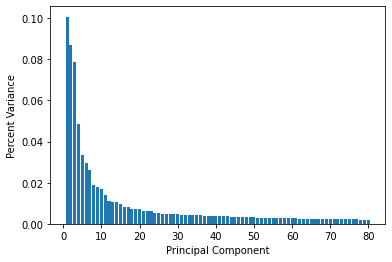

In [66]:
plt.bar(xs, share, align='center')
plt.xlabel("Principal Component")
plt.ylabel("Percent Variance")

In [0]:
sorted_share = list.sort(share, reverse=True)

In [0]:
sorted_share

(array([65.,  4.,  3.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.]),
 array([0.00203997, 0.00884188, 0.01564379, 0.0224457 , 0.02924761,
        0.03604952, 0.04285143, 0.04965334, 0.05645525, 0.06325716,
        0.07005907, 0.07686098, 0.08366288, 0.09046479, 0.0972667 ,
        0.10406861]),
 <a list of 15 Patch objects>)

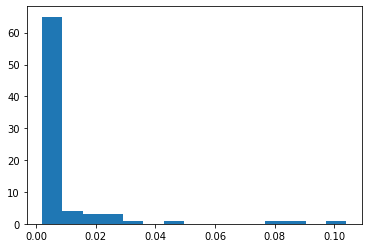

In [45]:
plt.hist(share,bins=15)

### Because 80 principal componients could explain 75% variance, so here we choose to take the first 80 PC to do further analysis

In [0]:
X_train_pca = np.matmul(X_train,(pca.components_.T)[:,:80])

In [0]:
X_train_pca.shape

(423, 80)

In [0]:
X_test_pca = np.matmul(X_test,(pca.components_.T)[:,:80])

In [0]:
L_R = LogisticRegression(penalty='none', 
                         dual=False, 
                         tol=0.0001, 
                         C=1.0, 
                         fit_intercept=True, 
                         intercept_scaling=1, 
                         class_weight=None, 
                         random_state=None, 
                         solver='lbfgs', 
                         max_iter=100, 
                         multi_class='ovr', 
                         verbose=0, 
                         warm_start=False, 
                         n_jobs=None, 
                         l1_ratio=None)

L_R.fit(X_train_pca, y_train)

prediction_y = L_R.predict(X_test_pca)

print(roc_auc_score(y_test, prediction_y))
print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))


0.6786833855799373
Accuracy after feature selection: 0.7830188679245284


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
for depth in range(1,10):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(X_train_pca,y_train)
    prediction_y=clf.predict(X_test_pca)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 1
Accuracy after feature selection: 0.7264150943396226
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.7264150943396226
ROC score without feature selection: 0.5214957456336766
Depth: 2
Accuracy after feature selection: 0.7264150943396226
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.7358490566037735
ROC score without feature selection: 0.5494849977608598
Depth: 3
Accuracy after feature selection: 0.7264150943396226
ROC score after feature selection: 0.5
Accuracy without feature selection: 0.7452830188679245
ROC score without feature selection: 0.5667263770712048
Depth: 4
Accuracy after feature selection: 0.7264150943396226
ROC score after feature selection: 0.5107478728168384
Accuracy without feature selection: 0.7358490566037735
ROC score without feature selection: 0.5602328705776982
Depth: 5
Accuracy after feature selection: 0.7358490566037735
ROC score after feature selection: 0.5279892521271832
Accuracy without feat

## Random Forest

In [0]:
for depth in range(10,20):
    print("Depth:",depth)
    clf=RandomForestClassifier(n_estimators=1000, max_depth=depth, random_state=0)
    clf.fit(X_train_pca,y_train)
    prediction_y=clf.predict(X_test_pca)
    print("Accuracy after feature selection:",metrics.accuracy_score(y_test, prediction_y))
    print("ROC score after feature selection:",roc_auc_score(y_test, prediction_y))
    clf.fit(X_train, y_train)
    pred_y=clf.predict(X_test)
    print("Accuracy without feature selection:",metrics.accuracy_score(y_test, pred_y))
    print("ROC score without feature selection:",roc_auc_score(y_test, pred_y))

Depth: 10
Accuracy after feature selection: 0.7264150943396226
ROC score after feature selection: 0.5429914912673534
Accuracy without feature selection: 0.7547169811320755
ROC score without feature selection: 0.5947156291983878
Depth: 11
Accuracy after feature selection: 0.7547169811320755
ROC score after feature selection: 0.5947156291983878
Accuracy without feature selection: 0.7641509433962265
ROC score without feature selection: 0.6119570085087327
Depth: 12
Accuracy after feature selection: 0.7547169811320755
ROC score after feature selection: 0.5947156291983878
Accuracy without feature selection: 0.7547169811320755
ROC score without feature selection: 0.5947156291983878
Depth: 13
Accuracy after feature selection: 0.7641509433962265
ROC score after feature selection: 0.6119570085087327
Accuracy without feature selection: 0.7641509433962265
ROC score without feature selection: 0.6119570085087327
Depth: 14
Accuracy after feature selection: 0.7641509433962265
ROC score after feature s

## CNN with PCR

In [0]:
X_train_pca = X_train[..., None]
X_test_pca = X_test[..., None]

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv1D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

In [0]:
cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [0]:
X_train_pca = tf.convert_to_tensor(X_train_pca, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_pca = tf.convert_to_tensor(X_test_pca, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
h1 = cnn_model.fit(X_train_pca, y_train,
              epochs=10,
              batch_size=32,
              validation_data=(X_test_pca, y_test))

Train on 423 samples, validate on 106 samples
Epoch 1/10
423/423 [==============================] - 11s 26ms/sample - loss: 1.9326 - accuracy: 0.5934 - val_loss: 0.7256 - val_accuracy: 0.6792
Epoch 2/10
423/423 [==============================] - 10s 24ms/sample - loss: 0.5246 - accuracy: 0.8061 - val_loss: 0.7455 - val_accuracy: 0.6981
Epoch 3/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.3730 - accuracy: 0.8511 - val_loss: 0.6972 - val_accuracy: 0.7075
Epoch 4/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.1876 - accuracy: 0.9125 - val_loss: 0.5826 - val_accuracy: 0.7075
Epoch 5/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.0724 - accuracy: 0.9882 - val_loss: 0.7951 - val_accuracy: 0.7358
Epoch 6/10
423/423 [==============================] - 10s 23ms/sample - loss: 0.0237 - accuracy: 0.9976 - val_loss: 0.8398 - val_accuracy: 0.7358
Epoch 7/10
423/423 [==============================] - 10s 23ms/sample - loss: 